In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv('ue_deltapt_dist.csv')
#806931 201956 201310 201899 201686


In [4]:
total = ds.iloc[:,0].values
k_1 = ds.iloc[:,1].values
k_2 = ds.iloc[:,2].values
k_3 = ds.iloc[:,3].values
k_4 = ds.iloc[:,4].values


In [30]:
from scipy.optimize import curve_fit

def fit_function(x, A, beta, B, MU, Sigma):
    print( "Fit results: mu = %.2f,  std = %.2f" % (MU, Sigma))
    return (A * np.exp(-x/beta) + B * np.exp(-1.0 * (x - MU)**2 / (2 * Sigma**2)))


(-100, 100)

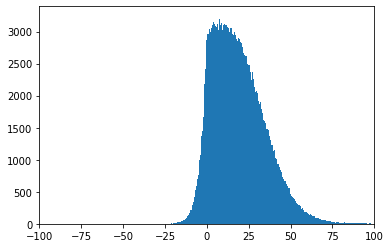

In [19]:
plt.hist(total, bins=100000)
plt.xlim(-100, 100)

Fitted mean =  15.636555933308074
Fitted standard deviation =  15.308419409699882


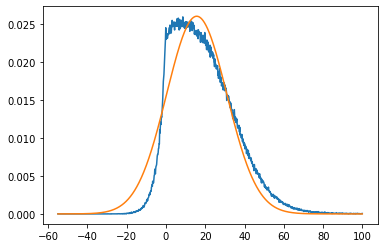

In [40]:
data=[]
for i in total:
    if i<100 and i>-100:
        data+=[i]
hist, bin_edges = np.histogram(data, density=True, bins=1000)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0, 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print ('Fitted mean = ', coeff[1])
print ('Fitted standard deviation = ', coeff[2])

plt.show()

4.263979647700823 -0.9088926976811821 25.104890093037234


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Fit results: a = 4.26,  loc= -0.91, scale= 25.10')

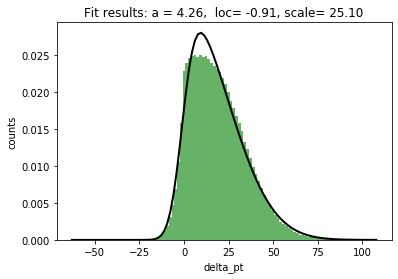

In [66]:
from scipy import stats
# choose some parameters
data=[]
for i in total:
    if i<100 and i>-100:
        data+=[i]
ae, loce, scalee = stats.skewnorm.fit(data)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(data, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("delta_pt")
plt.ylabel("counts")
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

Fit results: mu = 1.00,  std = 1.00
Fit results: mu = 1.00,  std = 1.00
Fit results: mu = 1.00,  std = 1.00
Fit results: mu = 1.00,  std = 1.00
Fit results: mu = 1.00,  std = 1.00
Fit results: mu = 1.00,  std = 1.00
Fit results: mu = 1.00,  std = 1.00
Fit results: mu = 1.00,  std = 1.00
Fit results: mu = 4656.73,  std = 14016.07
Fit results: mu = 4656.73,  std = 14016.07
Fit results: mu = 4656.73,  std = 14016.07
Fit results: mu = 4656.73,  std = 14016.07
Fit results: mu = 4656.73,  std = 14016.07
Fit results: mu = 4656.73,  std = 14016.07
Fit results: mu = -82264.69,  std = 109072.21
Fit results: mu = -82264.69,  std = 109072.21


Text(0, 0.5, 'counts')

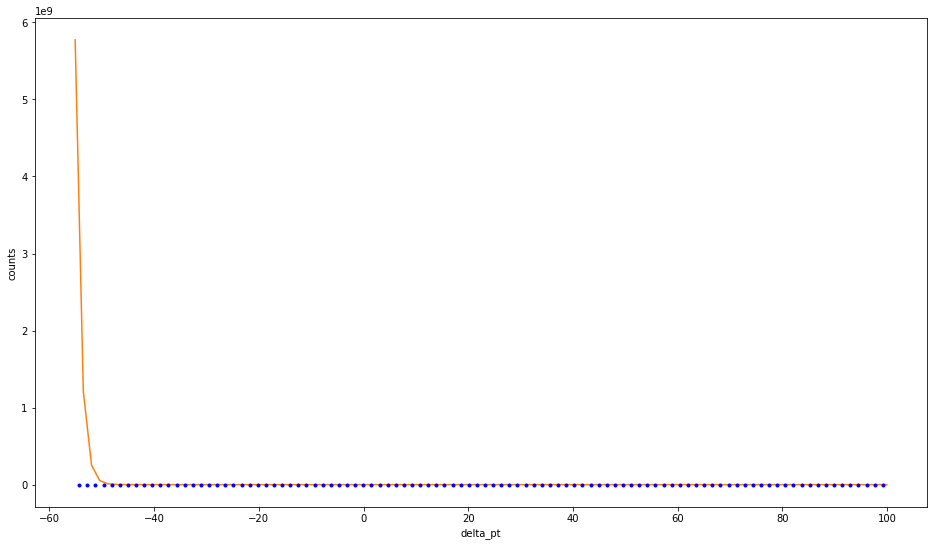

In [31]:
#806931 201956 201310 201899 201686
#fig =plt.figure(figsize=(16, 9))
#ax1 = fig.add_subplot(2,2,1)
plt.figure(figsize=(16, 9))
a=[]
for i in k_1[:201956]:
    if i<100 and i>-100:
        a+=[i]
ax1, edges, _= plt.hist(a, bins=100)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, ax1, yerr=np.sqrt(ax1), fmt='b.')
xspace = np.linspace(edges[0], edges[-1], 100)
params, y = curve_fit(fit_function, bin_centers, ax1 )
plt.plot(xspace, fit_function(xspace, *params) )

plt.xlabel('delta_pt')
plt.ylabel('counts')
#plt.xlim(-100, 100)
#plt.title(title)



In [ ]:
ax1 = fig.add_subplot(2,2,2)
ax1= plt.hist(k_2[:201310], bins=1000)
plt.xlabel('delta_pt')
plt.ylabel('counts')
plt.xlim(-100, 100)
plt.title('Second Quadrant')

ax1 = fig.add_subplot(2,2,3)
ax1= plt.hist(k_3[:201899], bins=1000)
plt.xlabel('delta_pt')
plt.ylabel('counts')
plt.xlim(-100, 100)
plt.title('Third Quadrant')

ax1 = fig.add_subplot(2,2,4)
ax1= plt.hist(k_4[:201686], bins=10000)
plt.xlabel('delta_pt')
plt.ylabel('counts')
plt.xlim(-100, 100)
plt.title('Fourth Quadrant')

4.083965894681654 -0.8531634615297754 25.044693857000834


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


4.4146932828767245 -1.0172991598613597 25.197245906505557


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


4.370353919609203 -0.9127563709487255 25.077769527802253


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


4.220431813294865 -0.8619728852992128 25.11266986309097


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


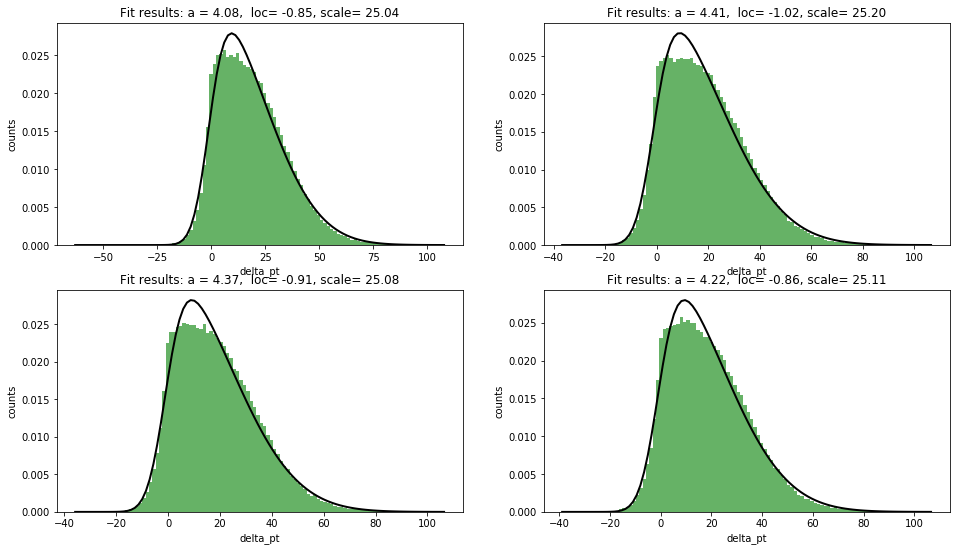

In [67]:
fig =plt.figure(figsize=(16, 9))
data=[]
for i in k_1[:201956]:
    if i<100 and i>-100:
        data+=[i]
ae, loce, scalee = stats.skewnorm.fit(data)
print(ae, loce, scalee)
# Plot the PDF.
ax1 = fig.add_subplot(2,2,1)
plt.hist(data, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))
plt.xlabel("delta_pt")
plt.ylabel("counts")
plt.plot(x, p, 'k', linewidth=2)

data=[]
for i in k_2[:201310]:
    if i<100 and i>-100:
        data+=[i]
ae, loce, scalee = stats.skewnorm.fit(data)
print(ae, loce, scalee)
# Plot the PDF.
ax1 = fig.add_subplot(2,2,2)
plt.hist(data, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))
plt.xlabel("delta_pt")
plt.ylabel("counts")
plt.plot(x, p, 'k', linewidth=2)


data=[]
for i in k_3[:201899]:
    if i<100 and i>-100:
        data+=[i]
ae, loce, scalee = stats.skewnorm.fit(data)
print(ae, loce, scalee)
# Plot the PDF.
ax1 = fig.add_subplot(2,2,3)
plt.hist(data, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))
plt.xlabel("delta_pt")
plt.ylabel("counts")
plt.plot(x, p, 'k', linewidth=2)

data=[]
for i in k_4[:201686]:
    if i<100 and i>-100:
        data+=[i]
ae, loce, scalee = stats.skewnorm.fit(data)
print(ae, loce, scalee)
# Plot the PDF.
ax1 = fig.add_subplot(2,2,4)
plt.hist(data, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))
plt.xlabel("delta_pt")
plt.ylabel("counts")
plt.plot(x, p, 'k', linewidth=2)


(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 8.0000e+00, 1.0000e+01,
        4.0000e+00, 6.0000e+00, 1.2000e+01, 1.7000e+01, 1.9000e+01,
        3.5000e+01, 3.9000e+01, 5.4000e+01, 7.5000e+01, 1.0300e+02,
        1.2200e+02, 1.6600e+02, 1.8200e+02, 2.9500e+02, 3.4900e+02,
        4.5300e+02, 6.1200e+02, 7.3000e+02, 9.4100e+02, 1.1730e+03,
        1.4680e+03, 1.8340e+03, 2.2520e+03, 2.6400e+03, 3.2930e+03,
        3.8990e+03, 4.6410e+03, 5.4740e+03, 6.7320e+03, 7.5640e+03,
        8.6950e+03, 1.0003e+04, 1.1760e+04, 1.3059e+04, 1.4649e+04,
        1.6448e+04, 1.8260e+04, 2.0462e+04, 2.2432e+04, 2.4400e+04,
        2.6479e+04, 2.8509e+04, 3.0209e+04, 3.1668e+04, 3.2508e+04,
        3.3419e+04, 3.3156e+04, 3.3117e+04, 3.2124e+04, 3.1188e+04,
        2.9819e+04, 2.8425e+04, 2.6296e+04, 2.4505e+04, 2.2810e+04,
        2.0839e+04, 1.8895e+04, 1.6979e+04, 1.5194e+04, 1.3263e+04,
        1.1672e+04, 1.0182e+04, 8.7830e+03, 7.3520e+03, 6.1030e+03,
        5.2130e+03, 4.2800e+03, 3.6160e+03, 2.94

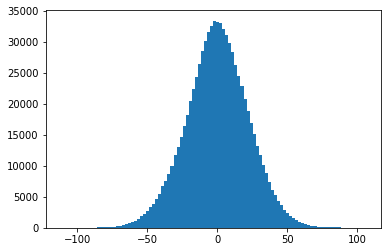

In [60]:
modified=[]
for i in total:
    if i<100 and i>-100:
        d= stats.skewnorm.rvs(4.083965894681654, -0.8531634615297754, 25.044693857000834, size=1)[0]
        k = i- d
        modified+=[k]
plt.hist(modified, bins=100)


-0.6439052182992315 10.807301475272101 24.660261093863063


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 1.0, 'Fit results: a = -0.64,  loc= 10.81, scale= 24.66')

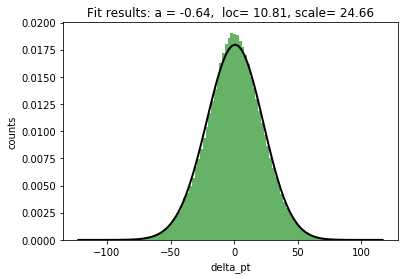

In [68]:
ae, loce, scalee = stats.skewnorm.fit(modified)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(modified, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("delta_pt")
plt.ylabel("counts")
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

0.3765096467128044 -9.280400806067394 32.79549330501146


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Fit results: a = 0.38,  loc= -9.28, scale= 32.80')

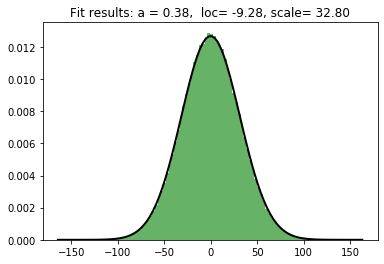

In [63]:
modified2=[]
for i in modified:
    if i<100 and i>-100:
        d= stats.skewnorm.rvs(-0.64, 10.81, 24.66, size=1)[0]
        k = i- d
        modified2+=[k]
ae, loce, scalee = stats.skewnorm.fit(modified2)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(modified2, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

0.0001911206679446529 -0.1607319699474568 44.20282866243117


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Fit results: a = 0.00,  loc= -0.16, scale= 44.20')

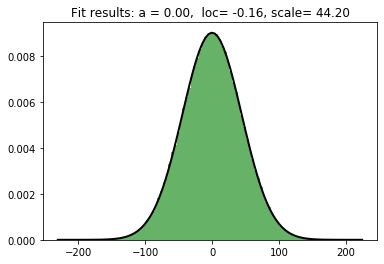

In [64]:
modified3=[]
for i in modified2:
    if i<100 and i>-100:
        d= stats.skewnorm.rvs(0.38,  -9.28, 32.80, size=1)[0]
        k = i- d
        modified3+=[k]
ae, loce, scalee = stats.skewnorm.fit(modified3)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(modified3, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

0.09402073977944482 -4.543607088629399 60.525414711831544


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Fit results: a = 0.09,  loc= -4.54, scale= 60.53')

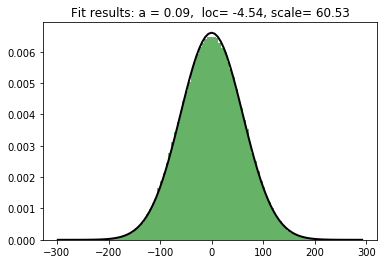

In [65]:
modified4=[]
for i in modified3:
    if i<100 and i>-100:
        d= stats.skewnorm.rvs(0,  -0.16,44.2, size=1)[0]
        k = i- d
        modified4+=[k]
ae, loce, scalee = stats.skewnorm.fit(modified4)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(modified4, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

In [3]:
ds = pd.read_csv('jet_bg.csv')
all_jets = ds.iloc[:,0].values
jets_after_sub= ds.iloc[:,1].values
sub= ds.iloc[:,2].values

Text(0.5, 1.0, 'jet pT distribution w/o bg subtraction')

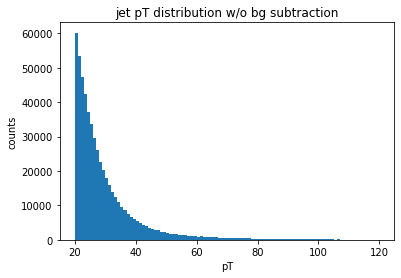

In [26]:
jets=[]
for i in all_jets: 
    if i<120:
        jets+=[i]
plt.hist(jets, bins= 100)
plt.xlabel("pT")
plt.ylabel("counts")
plt.title("jet pT distribution w/o bg subtraction")

Text(0.5, 1.0, 'jet pT  distribution after ONLY random cone correction')

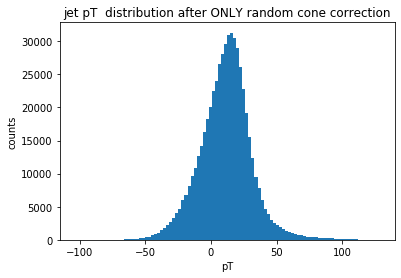

In [27]:
from scipy import stats
sub_p= []
new_jets=[]
for i in jets: 
    l= stats.skewnorm.rvs(4.083965894681654, -0.8531634615297754, 25.044693857000834, size=1)[0]
    k = i- l
    sub_p+=[l]
    new_jets+=[k]
plt.hist(new_jets, bins= 100)
plt.xlabel("pT")
plt.ylabel("counts")
plt.title("jet pT  distribution after ONLY random cone correction")

Text(0.5, 1.0, 'jet pT distribution w bg subtraction')

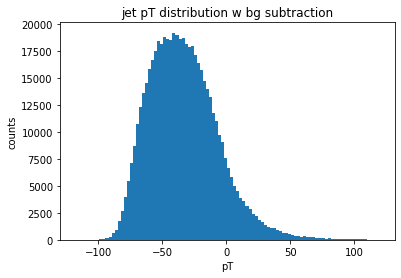

In [10]:
jets=[]
for i in jets_after_sub: 
    if i<120:
        jets+=[i]
plt.hist(jets, bins= 100)
plt.xlabel("pT")
plt.ylabel("counts")
plt.title("jet pT distribution w bg subtraction")

-2.4331249725525295 89.19513701142205 35.012882768694695


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 1.0, 'pT subtracted w area subtraction, Fit results: a = -2.43,  loc= 89.20, scale= 35.01')

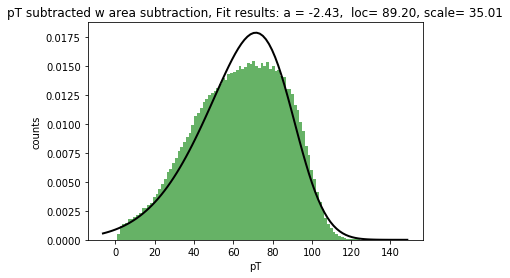

In [22]:
ae, loce, scalee = stats.skewnorm.fit(sub)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(sub, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("pT")
plt.ylabel("counts")
plt.title("pT subtracted w area subtraction, Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

Text(0.5, 1.0, 'jet pT  distribution after random cone correction')

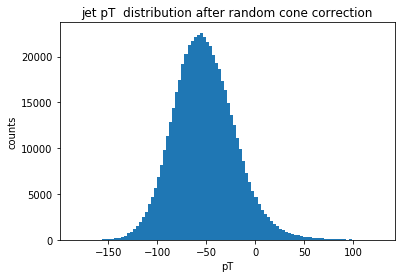

In [23]:
from scipy import stats
sub_p= []
new_jets=[]
for i in jets: 
    l= stats.skewnorm.rvs(4.083965894681654, -0.8531634615297754, 25.044693857000834, size=1)[0]
    k = i- l
    sub_p+=[l]
    new_jets+=[k]
plt.hist(new_jets, bins= 100)
plt.xlabel("pT")
plt.ylabel("counts")
plt.title("jet pT  distribution after random cone correction")

4.064402806376725 -0.8763695212341249 25.084665452666542


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 1.0, 'pT  subtracted w random cones, Fit results: a = 4.06,  loc= -0.88, scale= 25.08')

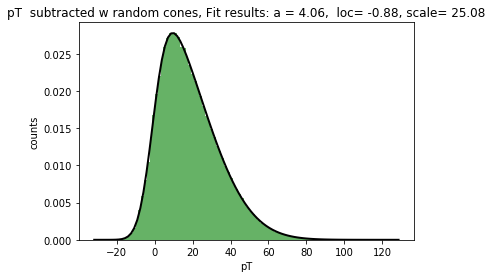

In [24]:
ae, loce, scalee = stats.skewnorm.fit(sub_p)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(sub_p, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("pT")
plt.ylabel("counts")
plt.title("pT  subtracted w random cones, Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

5.5034972448579434e-05 81.63083107426999 28.09014041310455


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'total pT  subtracted, Fit results: a = 0.00,  loc= 81.63, scale= 28.09')

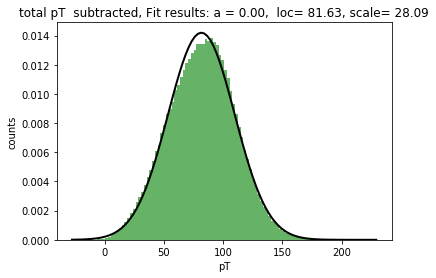

In [30]:
total_sub=[]
for i in range(min(len(sub), len(sub_p))):
    total_sub+=[sub[i] + sub_p[i]]

ae, loce, scalee = stats.skewnorm.fit(total_sub)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(total_sub, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("pT")
plt.ylabel("counts")
plt.title("total pT  subtracted, Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

In [28]:
ds = pd.read_csv('jet_bg_ntuple.csv')
all_jets_nt = ds.iloc[:,0].values

-6.0601606161666025e-05 63.11204533052437 23.222897730276607


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 1.0, 'pT  subtracted from ntuple, Fit results: a = -0.00,  loc= 63.11, scale= 23.22')

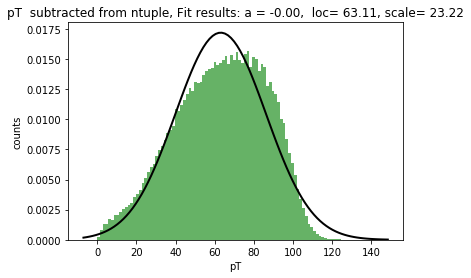

In [29]:
ae, loce, scalee = stats.skewnorm.fit(all_jets_nt)
print(ae, loce, scalee)
# Plot the PDF.
plt.figure()
plt.hist(all_jets_nt, bins=100, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("pT")
plt.ylabel("counts")
plt.title("pT  subtracted from ntuple, Fit results: a = %.2f,  loc= %.2f, scale= %.2f" % (ae, loce, scalee))

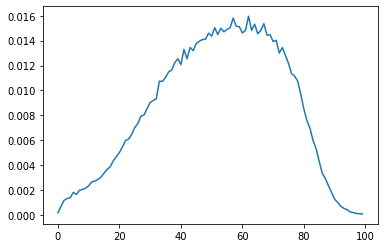

In [36]:
bg=[]
for i in total_sub: 
    if i>0 and i<120:
        bg+=[i]
bgn=[]
for i in all_jets_nt: 
    if i>0 and i<120:
        bgn+=[i]
hist, bin_edges = np.histogram(bg, density=True, bins=100)
hist2, bin_edges2 = np.histogram(bgn, density=True, bins=100)
ratio=[]
for i in range(len(hist)):
    ratio+= [hist[i]/ hist2[i]]
plt.plot(hist2)